### Merging

In this example we'll combine the UFO sightings data with the recorded Fireball data. 

In [1]:
#1. Import libraries
import pandas as pd
import datetime
import os
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
filepath = os.path.join("..","Space Data")


In [3]:
[f for f in os.listdir(filepath)]

['exoplanets.csv',
 'SolarSystemAndEarthquakes.csv',
 'Fireball Reports.csv',
 'UFO_Sightings_Global.csv',
 'astronauts.csv',
 'Meteorite_Landings.csv']

In [4]:
df = pd.read_csv(os.path.join(filepath,"SolarSystemAndEarthquakes.csv"))

In [5]:
df.head()

,earthquake.time,earthquake.latitude,earthquake.longitude,earthquake.mag,earthquake.place,MoonPhase.dynamic,MoonPhase.value,MoonPhase.total,MoonPhase.percent,MoonPhase.illumination,...,Neptune.housenumber,Pluto.longitude,Pluto.latitude,Pluto.rectascension,Pluto.declination,Pluto.azimuth,Pluto.height,Pluto.speed,Pluto.house,Pluto.housenumber
0,2016-04-29T01:33:38.940Z,10.2705,-103.7150,6.6,Northern East Pacific Rise,dsc,21.102878,29.530588,71.461083,28.538917,...,4.855731,287.456664,1.458687,288.717312,-20.849043,294.602418,-60.711436,-0.004875,62.774958,3.092499
1,2016-04-28T19:33:24.420Z,-16.0743,167.3926,7.0,1km SE of Norsup_Vanuatu,dsc,20.801902,29.530588,70.441882,29.558118,...,10.821472,287.458035,1.458864,288.718743,-20.848692,75.715379,61.913464,-0.005482,242.688552,9.089618
2,2016-04-20T08:33:47.600Z,0.6359,-80.2083,6.2,19km WNW of Muisne_Ecuador,asc,13.041587,29.530588,44.162976,88.325952,...,12.866854,287.484120,1.466467,288.745387,-20.837893,306.628344,52.338472,-0.000961,301.730362,11.057679
3,2016-04-16T23:58:37.280Z,0.3715,-79.9398,7.8,27km SSE of Muisne_Ecuador,asc,10.108874,29.530588,34.231876,68.463751,...,5.254719,287.484562,1.469462,288.745447,-20.834871,322.775621,-63.936274,0.000967,73.503629,3.450121
4,2016-04-15T16:25:06.260Z,32.7820,130.7259,7.0,1km WSW of Kumamoto-shi_Japan,asc,8.803186,29.530588,29.810397,59.620794,...,2.162465,287.483388,1.470527,288.744056,-20.833960,299.716096,6.217801,0.001607,350.113718,12.670457


In [6]:
ufo = pd.read_csv(os.path.join(filepath,"UFO_Sightings_Global.csv"))
fire = pd.read_csv(os.path.join(filepath,"Fireball Reports.csv"))
meteorite = pd.read_csv(os.path.join(filepath,"Meteorite_Landings.csv"))

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
meteorite.head()

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,01/01/1880 12:00:00 AM,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,01/01/1951 12:00:00 AM,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.0,Fell,01/01/1952 12:00:00 AM,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,01/01/1976 12:00:00 AM,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370,Valid,L6,780.0,Fell,01/01/1902 12:00:00 AM,-33.16667,-64.95000,"(-33.166670, -64.950000)"


In [8]:
fire.head()

,DateTime of Peak Brightness,Latitude,Longitude,Altitude (km),Velocity (km/s),Velocity Components (km/s): vx,Velocity Components (km/s): vy,Velocity Components (km/s): vz,Total Radiated Energy (J),Calculated Total Impact Energy (kt)
0,2009-11-21 20:53:00,-22.0,29.2,38.0,32.1,3.0,-17.0,-27.0,10000000000000,18.00
1,2015-01-09 10:41:11,2.0,28.8,36.0,NaN,-10.7,-7.6,11.6,139000000000,0.41
2,2014-05-16 12:42:48,-44.2,-176.2,44.0,NaN,14.4,4.6,6.5,309000000000,0.82
3,2014-08-23 06:29:41,-61.7,132.6,22.2,16.2,-2.3,5.7,16.5,3820000000000,7.60
4,2014-12-12 06:48:11,33.5,144.9,26.3,NaN,11.5,-2.8,-2.2,33000000000,0.11


Let's create one dataframe that has both ufo sightings and fireball sightings so we can map them together.

In [9]:
#Let's make sure both days are datetime objects
ufo['day']=pd.to_datetime(ufo['day_sighted']).dt.date
fire['day']=pd.to_datetime(fire['DateTime of Peak Brightness']).dt.date
fire['time']=pd.to_datetime(fire['DateTime of Peak Brightness']).dt.time

In [10]:
ufo_sub = ufo[['day','time','latitude','longitude']]
fire_sub = fire[['day','time','Latitude','Longitude']]

In [11]:
fire_sub = fire_sub.rename(columns = {'Latitude':'latitude','Longitude':'longitude'})
fire_sub['type']='Fireball'
ufo_sub['type']='UFO'

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [12]:
sub = fire_sub.append(ufo_sub,ignore_index = True)

In [13]:
sub_f = sub[sub['latitude'].isnull()==False]

In [14]:
sub_f.shape

(96500, 5)

In [15]:
sub_f.head()

,day,time,latitude,longitude,type
0,2009-11-21,20:53:00,-22,29.2,Fireball
1,2015-01-09,10:41:11,2,28.8,Fireball
2,2014-05-16,12:42:48,-44.2,-176.2,Fireball
3,2014-08-23,06:29:41,-61.7,132.6,Fireball
4,2014-12-12,06:48:11,33.5,144.9,Fireball


In [16]:
pt =sub_f[['day','type']].pivot_table(index = 'day',columns = 'type',aggfunc = len).fillna(0)

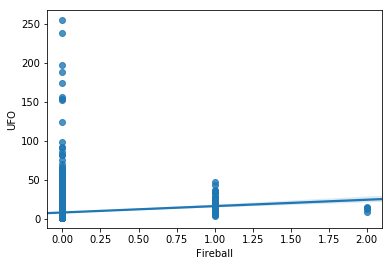

In [17]:
sns.regplot(data = pt,x = 'Fireball',y = 'UFO')

Text(0.5,1,'Distribution of UFO Sightings on days where there was a Fireball sighting')

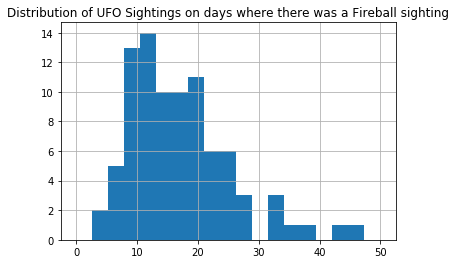

In [22]:
import numpy as np
bins = np.linspace(0, 50, 20)
pt[pt['Fireball']>0]['UFO'].hist(bins=bins)
plt.title("Distribution of UFO Sightings on days where there was a Fireball sighting")

Text(0.5,1,'Distribution of UFO Sightings on days where there was not a Fireball sighting')

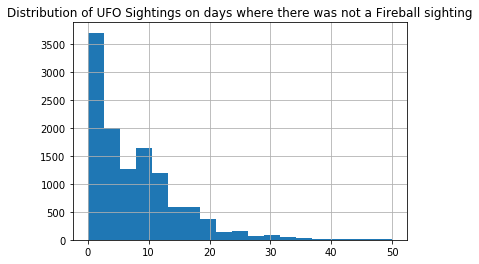

In [23]:
pt[pt['Fireball']==0]['UFO'].hist(bins=bins)
plt.title("Distribution of UFO Sightings on days where there was not a Fireball sighting")

To compare these distibutions more easily, let's also use matplotlib to see them on the same axes, normalised such that the area under each curve is the same

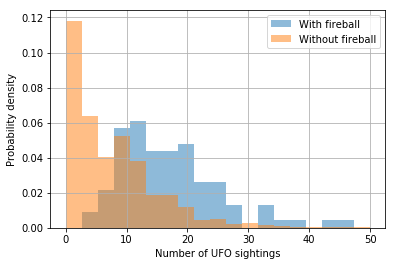

In [31]:
import matplotlib.pyplot as plt
plt.hist(pt[pt['Fireball']>0]['UFO'], bins=bins, density=True, alpha=0.5, label='With fireball')
plt.hist(pt[pt['Fireball']==0]['UFO'], bins=bins, density=True, alpha=0.5, label='Without fireball')
plt.xlabel('Number of UFO sightings')
plt.ylabel('Probability density')
plt.legend()
plt.grid()
plt.show()

Seems to me that the presence of a fireball does increase the number of Ufo sigthings in the day, but there's much more to be done. 

A possible next step would be to compare the distance between fireballs and ufo sigtings for days in which there were both. 


#### P.S. You may find some of the data is not perfectly formatted. This code is how I fixed a letter "q" that showed up in latitudes for some reason. 

In [47]:
sub_f.dtypes

day           object
time          object
latitude      object
longitude    float64
type          object
dtype: object

In [48]:
sub_f['latitude']=sub_f['latitude'].str.replace('q',"").astype(float)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


## CHALLENGE: Can you merge the meterorite data with earthquakes?

In [51]:
## Type code here...

## CHALLENGE: Can you merge the London UFO sightings with the corresponding day's air quality readings (from the Climate folder)?
Is there a pattern to air quality and UFO sightings?